# Exploratary Data Analysis on XES3G5M Dataset

Glossary
- KT - Knowledge Tracing
- KC - Knowledge Component (A KC is a generalization of everyday terms like concept, principle, fact, or skill)

### 1. Loading the datasets

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datasets import load_dataset

/mnt/research/Projects/KnowledgeTracing/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

interaction_sequences_dataset = load_dataset(
    "Atomi/XES3G5M_interaction_sequences"
)

content_metadata_dataset = load_dataset(
    "Atomi/XES3G5M_content_metadata"
)

### 2. Save to data folder (Optional)

In [ ]:
# interaction_sequences_dataset.save_to_disk("../data/raw/XES3G5M_interaction_sequences")
# content_metadata_dataset.save_to_disk("../data/raw/XES3G5M_content_metadata")

Saving the dataset (1/1 shards): 100%|██████████| 1175/1175 [00:00<00:00, 97826.58 examples/s] 


### 3. Data Exploration of Interaction Sequence Dataset

#### 3.1 Overview of the dataset

Lets look at interaction sequence dataset features

In [4]:
interaction_sequences_dataset["train"].features

{'fold': Value(dtype='int64', id=None),
 'uid': Value(dtype='int64', id=None),
 'questions': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None),
 'concepts': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None),
 'responses': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None),
 'timestamps': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None),
 'selectmasks': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None),
 'is_repeat': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None)}

Taken from https://github.com/ai4ed/XES3G5M/tree/main#kc-level

Each student interaction sequence at question level is first expanded into KC level when a question is associated with multiple KCs. After that, each sequence is truncated into sub-sequences of length of 200. The data has been randomly split into 5 folds, the columns of this file are described as follows:

- fold: the unique id of each fold, ranging from 0 to 4;

- uid: the unique internal id of the user;

- questions: the sequence of internal question ids;

- concepts: the corresponding sequence of internal KC ids, in this file, we use only the leaf nodes of the KCs in the KC routes;

- responses: the correctness of the students' answers, "1" means right, "0" means wrong;

- timestamps: the regular start timestamps of the interactions, the timestamps are millisecond level;

- selectmasks: if the length of current sequence is less than 200, we pad it to 200, "-1" indicates the corresponding interaction is padded or only used as history which needs to be ignored when calculating the loss and evaluating the models' performance;

- is_repeat: "1" indicates that the current KC and its previous KC belong to the same question, "0" means this is a new question.

In [5]:
# convert the dataset to pandas dataframe
interaction_sequences_df = interaction_sequences_dataset["train"].to_pandas()
interaction_sequences_df.head()

,fold,uid,questions,concepts,responses,timestamps,selectmasks,is_repeat
0,0,11066,"[3751, 3752, 3753, 3754, 1990, 3739, 3740, 374...","[187, 187, 374, 187, 374, 188, 188, 228, 166, ...","[1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, ...","[1595229836000, 1595233013000, 1595233687000, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
1,0,11066,"[95, 4294, 4294, 4300, 4300, 4301, 4302, 4308,...","[63, 64, 102, 659, 376, 147, 147, 65, 64, 78, ...","[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, ...","[1608890160000, 1608892236000, 1608892236000, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,0,14482,"[266, 268, 2203, 870, 2316, 2587, 2323, 2588, ...","[9, 139, 140, 9, 496, 232, 231, 231, 146, 145,...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1595896054000, 1595896054000, 1595896054000, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ..."
3,0,14482,"[1280, 1046, 405, 404, 404, 4623, 4622, 4622, ...","[257, 32, 204, 204, 205, 206, 526, 206, 206, 2...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, ...","[1614471945000, 1614471945000, 1614471945000, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
4,0,10532,"[268, 266, 2203, 2588, 2587, 2323, 275, 811, 2...","[139, 9, 140, 231, 232, 231, 30, 30, 62, 65, 6...","[1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...","[1595918717000, 1595918717000, 1595918717000, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."


In [6]:
# lets look at the training data info
interaction_sequences_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33397 entries, 0 to 33396
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   fold         33397 non-null  int64 
 1   uid          33397 non-null  int64 
 2   questions    33397 non-null  object
 3   concepts     33397 non-null  object
 4   responses    33397 non-null  object
 5   timestamps   33397 non-null  object
 6   selectmasks  33397 non-null  object
 7   is_repeat    33397 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.0+ MB


> No null values 

In [7]:
# unique folds
print(f"Unique folds: {interaction_sequences_df['fold'].nunique()}")
# unique users
print(f"Unique users: {interaction_sequences_df['uid'].nunique()}")
# number of rows
print(f"Number of rows: {interaction_sequences_df.shape[0]}")
# average sessions per user
print(f"Average sessions per user: {interaction_sequences_df.groupby('uid')['questions'].count().mean()}")


Unique folds: 5
Unique users: 14453
Number of rows: 33397
Average sessions per user: 2.3107313360547983


> Number of users and row count is different -> each user has 1 or more "sessions"

#### 3.2 Question related data explorations

Lets look at the question representation in the dataset. i.e How many times each question has attempted? 

In [8]:
question_attempts = interaction_sequences_df.explode("questions").value_counts("questions").to_frame('fq').reset_index().sort_values('fq', ascending=False).reset_index(drop=True)

print(f"Number of questions: {len(question_attempts)}")
question_attempts.head()

Number of questions: 7619


,questions,fq
0,-1,1540356
1,344,23488
2,1318,18580
3,404,16052
4,336,15915


> "-1" is the padding value. Lets remove it to see the actual distribution

In [9]:
question_attempts = question_attempts[question_attempts["questions"] != -1]
question_attempts.head()

,questions,fq
1,344,23488
2,1318,18580
3,404,16052
4,336,15915
5,1344,13276


In [10]:
# print(question_attempts.fq.describe())

print(f"Max attempts of any question: {question_attempts.fq.max()}")
print(f"Min attempts of any question: {question_attempts.fq.min()}")
print(f"Mean attempts of any question: {question_attempts.fq.mean()}")
print(f"Median attempts of any question: {question_attempts.fq.median()}")
print(f"Std attempts of any question: {question_attempts.fq.std()}")



Max attempts of any question: 23488
Min attempts of any question: 1
Mean attempts of any question: 674.5922814386978
Median attempts of any question: 193.0
Std attempts of any question: 1287.455094010006


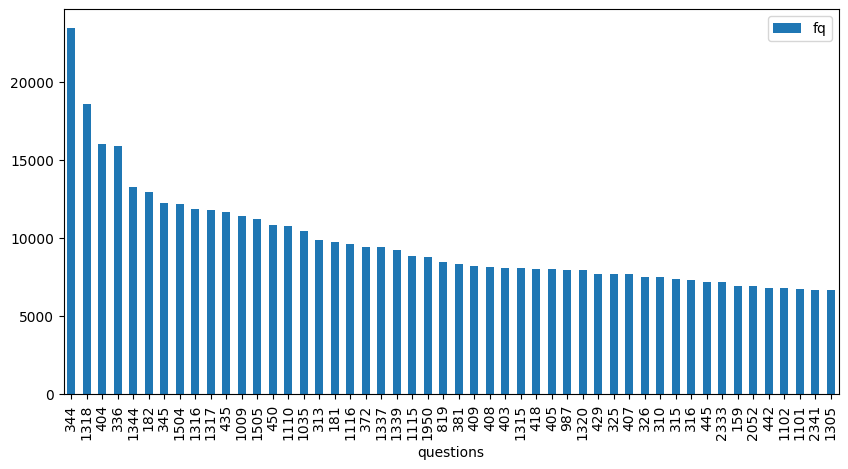

In [11]:
# lets look at the top 50 question attempts just to get the idea visually
question_attempts.head(50).plot(kind='bar', x='questions', y='fq', figsize=(10, 5))
plt.show()

In [12]:
# number of sessions per student
sessions_by_student = interaction_sequences_df.groupby("uid")["questions"].count().to_frame('fq').reset_index().sort_values('fq', ascending=False).reset_index(drop=True)
sessions_by_student.head()


,uid,fq
0,8854,6
1,300,5
2,9880,4
3,9899,4
4,8843,4


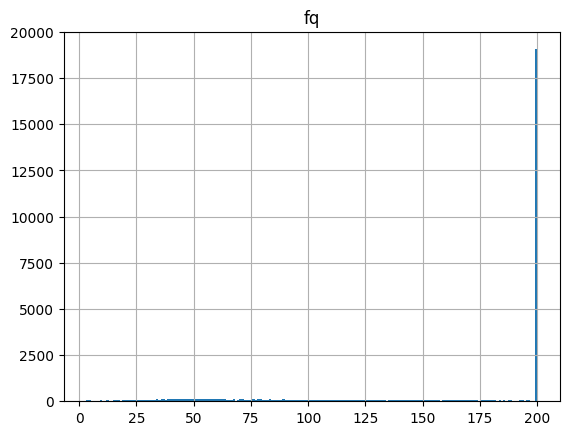

In [13]:
def flatten_list(list_of_lists):
    """ recursively flatten a list of lists """
    for item in list_of_lists:
        if isinstance(item, list):
            yield from flatten_list(item)
        else:
            yield item

def drop_padding(question_list, padding_value=-1):
    """Drop the padding value from the question list"""
    return [question for question in question_list if question != padding_value]

# number of questions per session
questions_per_session = interaction_sequences_df["questions"].apply(lambda x: len(drop_padding(x))).to_frame('fq').sort_values('fq', ascending=False).reset_index(drop=True)
questions_per_session.hist(bins=200)
plt.show()

>Looks like more than 50% of the sessions have 200 questions answered

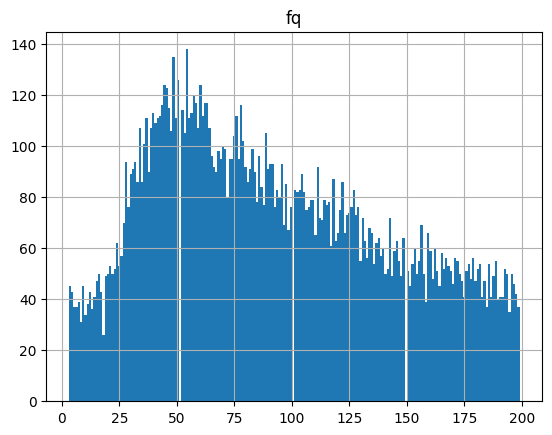

In [14]:
# lets look at the sessions with less than 200 questions
questions_per_session[questions_per_session["fq"] < 200].hist(bins=200)
plt.show()

In [15]:
questions_per_session[questions_per_session["fq"] < 200].describe()

,fq
count,14337.000000
mean,92.560787
std,50.749380
min,3.000000
25%,51.000000
50%,85.000000
75%,131.000000
max,199.000000


#### 3.3 Concept related explorations

In [16]:
# concepts per session
concepts_per_session = interaction_sequences_df["concepts"].apply(lambda x: len(drop_padding(x))).to_frame('fq').sort_values('fq', ascending=False).reset_index(drop=True)
concepts_per_session.head()

,fq
0,200
1,200
2,200
3,200
4,200


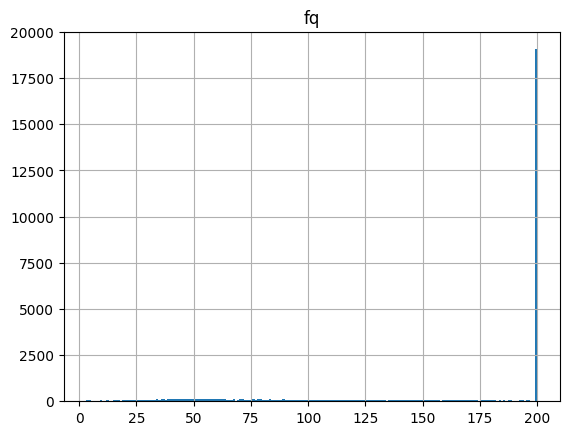

In [17]:
# lets look at the concepts per session histogram
concepts_per_session.hist(bins=200)
plt.show()

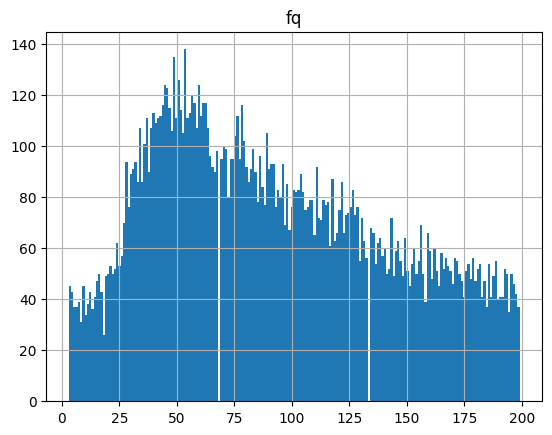

In [18]:
# lets look at the sessions with less than 200 concepts
concepts_per_session[concepts_per_session["fq"] < 200].hist(bins=199)
plt.show()

In [19]:
concepts_per_session.describe()

,fq
count,33397.000000
mean,153.877414
std,62.719681
min,3.000000
25%,99.000000
50%,200.000000
75%,200.000000
max,200.000000


Concept representation on the dataset

In [20]:
concepts_attempts = interaction_sequences_df.explode("concepts").value_counts("concepts").to_frame('fq').reset_index().sort_values('fq', ascending=False).reset_index(drop=True)
concepts_attempts = concepts_attempts[concepts_attempts["concepts"] != -1]
print(f"Number of concepts: {len(concepts_attempts)}")
concepts_attempts.head()

Number of concepts: 865


,concepts,fq
1,18,120791
2,78,111675
3,55,96147
4,155,84600
5,24,79996


From the dataset we can see that `# of concepts < # of questions`

> each concept has one or more question

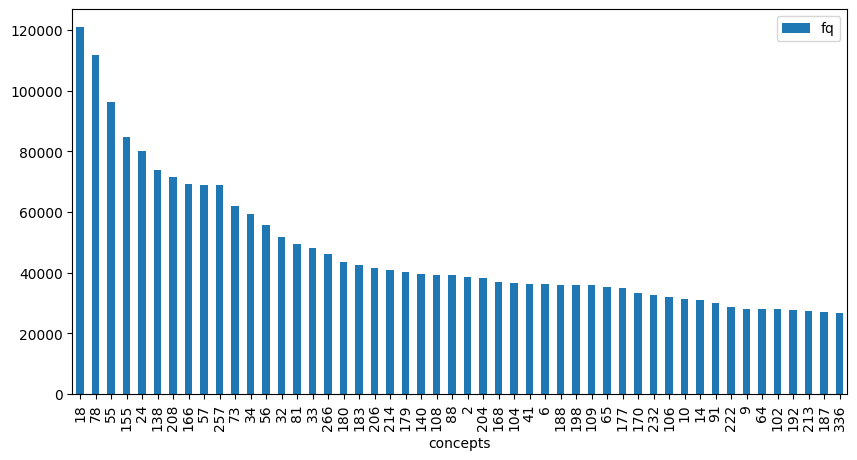

In [21]:
# lets look at the top 50 concept attempts to get the idea visually
concepts_attempts.head(50).plot(kind='bar', x='concepts', y='fq', figsize=(10, 5))
plt.show()

#### 3.4 Response related exploration

In [22]:
# lets look at the response column
# each response is a list consisting of binary value or padding value (-1)
interaction_sequences_df["responses"].head()

0    [1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, ...
1    [0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, ...
2    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, ...
4    [1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...
Name: responses, dtype: object

In [23]:
# lets look at the response distribution
response_distribution = interaction_sequences_df["responses"].explode().value_counts().to_frame('fq').reset_index().sort_values('fq', ascending=False).reset_index(drop=True)
response_distribution.head()

,responses,fq
0,1,4088636
1,-1,1540356
2,0,1050408


In [24]:
response_distribution = response_distribution[response_distribution["responses"] != -1]

print(f"overall correct answers: {response_distribution[response_distribution['responses'] == 1].fq.sum()}")
print(f"overall incorrect answers: {response_distribution[response_distribution['responses'] == 0].fq.sum()}")
print(f"overall correct answers percentage: {response_distribution[response_distribution['responses'] == 1].fq.sum() / (response_distribution[response_distribution['responses'] == 1].fq.sum() + response_distribution[response_distribution['responses'] == 0].fq.sum()) * 100}%")
print(f"overall incorrect answers percentage: {response_distribution[response_distribution['responses'] == 0].fq.sum() / (response_distribution[response_distribution['responses'] == 1].fq.sum() + response_distribution[response_distribution['responses'] == 0].fq.sum()) * 100}%")


overall correct answers: 4088636
overall incorrect answers: 1050408
overall correct answers percentage: 79.56024505725189%
overall incorrect answers percentage: 20.439754942748106%


In [25]:
# correct answers per session
correct_answers_per_session = interaction_sequences_df["responses"].apply(lambda x: sum(drop_padding(x))/len(drop_padding(x))).to_frame('fq').sort_values('fq', ascending=False).reset_index(drop=True)
correct_answers_per_session.head()


,fq
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


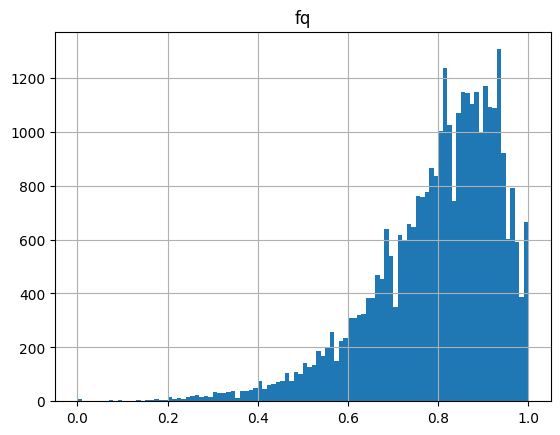

In [26]:
# lets look at the correct answers per session histogram
correct_answers_per_session.hist(bins=100)
plt.show()

In [27]:
correct_answers_per_session.describe()

,fq
count,33397.000000
mean,0.794970
std,0.142002
min,0.000000
25%,0.720000
50%,0.825000
75%,0.900000
max,1.000000


In [47]:
# lets look at the correct answers per question
question_correctness = interaction_sequences_df.explode(["questions", "responses"])[["questions", "responses"]].groupby("questions")["responses"].value_counts().unstack().fillna(0).reset_index().sort_values("questions").set_index("questions")

question_correctness.head()

responses,-1,0,1
questions,,,
-1,1540356.0,0.0,0.0
0,0.0,210.0,2023.0
1,0.0,520.0,952.0
2,0.0,387.0,1783.0
3,0.0,411.0,2822.0


In [48]:
# drop the padding column
question_correctness = question_correctness.drop(-1, axis=1)
question_correctness.columns = ["incorrect", "correct"]
question_correctness.head()

,incorrect,correct
questions,,
-1,0.0,0.0
0,210.0,2023.0
1,520.0,952.0
2,387.0,1783.0
3,411.0,2822.0


In [49]:
question_correctness["total"] = question_correctness["correct"] + question_correctness["incorrect"]
question_correctness["correct_percentage"] = question_correctness["correct"] / question_correctness["total"] * 100
question_correctness["incorrect_percentage"] = question_correctness["incorrect"] / question_correctness["total"] * 100
question_correctness = question_correctness.sort_values("correct_percentage", ascending=False).reset_index()

In [51]:
question_correctness.head(50)

,questions,incorrect,correct,total,correct_percentage,incorrect_percentage
0,7631,0.0,1.0,1.0,100.0,0.0
1,7626,0.0,1.0,1.0,100.0,0.0
2,7624,0.0,1.0,1.0,100.0,0.0
3,7615,0.0,14.0,14.0,100.0,0.0
4,7651,0.0,1.0,1.0,100.0,0.0
5,6433,0.0,4.0,4.0,100.0,0.0
6,6437,0.0,2.0,2.0,100.0,0.0
7,6441,0.0,8.0,8.0,100.0,0.0
8,6445,0.0,4.0,4.0,100.0,0.0
9,6457,0.0,5.0,5.0,100.0,0.0


In [52]:
question_correctness.sort_values(["correct_percentage", "total"], ascending=[False, False]).head(50)

,questions,incorrect,correct,total,correct_percentage,incorrect_percentage
510,570,0.0,1697.0,1697.0,100.0,0.0
508,573,0.0,1640.0,1640.0,100.0,0.0
511,569,0.0,1621.0,1621.0,100.0,0.0
507,574,0.0,1477.0,1477.0,100.0,0.0
509,571,0.0,1056.0,1056.0,100.0,0.0
599,1452,0.0,1019.0,1019.0,100.0,0.0
186,1900,0.0,584.0,584.0,100.0,0.0
187,1899,0.0,580.0,580.0,100.0,0.0
26,3088,0.0,430.0,430.0,100.0,0.0
27,3087,0.0,422.0,422.0,100.0,0.0


In [55]:
# we know that on average 79% of the answers are correct
# lets look at the questions with less than 50% correct answers, they are the most difficult questions
question_correctness[question_correctness["correct_percentage"] < 50].sort_values(["correct_percentage", "total"], ascending=[True,False]).head(50)

,questions,incorrect,correct,total,correct_percentage,incorrect_percentage
7552,4955,390.0,0.0,390.0,0.0,100.0
7553,4954,369.0,0.0,369.0,0.0,100.0
7493,4953,222.0,0.0,222.0,0.0,100.0
7610,5873,206.0,0.0,206.0,0.0,100.0
7582,5068,150.0,0.0,150.0,0.0,100.0
7567,6016,89.0,0.0,89.0,0.0,100.0
7494,5549,62.0,0.0,62.0,0.0,100.0
7561,6860,56.0,0.0,56.0,0.0,100.0
7569,5605,50.0,0.0,50.0,0.0,100.0
7521,1625,36.0,0.0,36.0,0.0,100.0


In [56]:
# lets look at the questions with more than 90% correct answers, they are the easiest questions
question_correctness[question_correctness["correct_percentage"] > 90].sort_values(["correct_percentage", "total"], ascending=[False,False]).head(50)

,questions,incorrect,correct,total,correct_percentage,incorrect_percentage
510,570,0.0,1697.0,1697.0,100.0,0.0
508,573,0.0,1640.0,1640.0,100.0,0.0
511,569,0.0,1621.0,1621.0,100.0,0.0
507,574,0.0,1477.0,1477.0,100.0,0.0
509,571,0.0,1056.0,1056.0,100.0,0.0
599,1452,0.0,1019.0,1019.0,100.0,0.0
186,1900,0.0,584.0,584.0,100.0,0.0
187,1899,0.0,580.0,580.0,100.0,0.0
26,3088,0.0,430.0,430.0,100.0,0.0
27,3087,0.0,422.0,422.0,100.0,0.0


#### 3.5 Timestamp related exploration

In [118]:
timestamps_df = interaction_sequences_df["timestamps"]
# convert the timestamps to datetime
timestamps_df = timestamps_df.to_frame()
timestamps_df.head()

,timestamps
0,"[1595229836000, 1595233013000, 1595233687000, ..."
1,"[1608890160000, 1608892236000, 1608892236000, ..."
2,"[1595896054000, 1595896054000, 1595896054000, ..."
3,"[1614471945000, 1614471945000, 1614471945000, ..."
4,"[1595918717000, 1595918717000, 1595918717000, ..."


In [141]:
timestamps_df['average_time_between_questions'] = timestamps_df['timestamps'].apply(lambda x: np.mean(np.diff(drop_padding(x)))/1000/60)

In [142]:
timestamps_df['number_of_questions'] = timestamps_df['timestamps'].apply(lambda x: len(drop_padding(x)))

In [146]:
timestamps_df.sort_values('average_time_between_questions', ascending=True).head(10)

,timestamps,average_time_between_questions,number_of_questions
33365,"[1621504511000, 1621504511000, 1621504511000, ...",0.0,6
27683,"[1622258613000, 1622258613000, 1622258613000, ...",0.0,6
19989,"[1622261596000, 1622261596000, 1622261596000, ...",0.0,3
30671,"[1621754532000, 1621754532000, 1621754532000, ...",0.0,3
33120,"[1622257901000, 1622257901000, 1622257901000, ...",0.0,9
4415,"[1621683248000, 1621683248000, 1621683248000, ...",0.0,8
28448,"[1612944027000, 1612944027000, 1612944027000, ...",0.0,5
25285,"[1621662601000, 1621662601000, 1621662601000, ...",0.0,13
26874,"[1621689378000, 1621689378000, 1621689378000, ...",0.0,11
10005,"[1621774048000, 1621774048000, 1621774048000, ...",0.0,11


In [145]:
timestamps_df.sort_values('average_time_between_questions', ascending=False).head(10)

,timestamps,average_time_between_questions,number_of_questions
13867,"[1605943828000, 1606539117000, 1606539117000, ...",15778.021875,17
28805,"[1609465355000, 1609465355000, 1609465355000, ...",15735.307692,14
20380,"[1608346843000, 1608346925000, 1608346925000, ...",13952.928889,16
17023,"[1614431785000, 1614431785000, 1614431785000, ...",12049.365000,11
28592,"[1615010343000, 1615010343000, 1615010343000, ...",10754.400000,5
7416,"[1614771566000, 1614771566000, 1614771566000, ...",10700.955556,7
13904,"[1611402680000, 1611402680000, 1611402680000, ...",10619.060417,17
22051,"[1609238684000, 1609238684000, 1609238684000, ...",10352.803333,21
8176,"[1609333903000, 1609333903000, 1609580775000, ...",10285.672500,21
28168,"[1607742023000, 1607742023000, 1607754220000, ...",10084.590278,25


<Axes: >

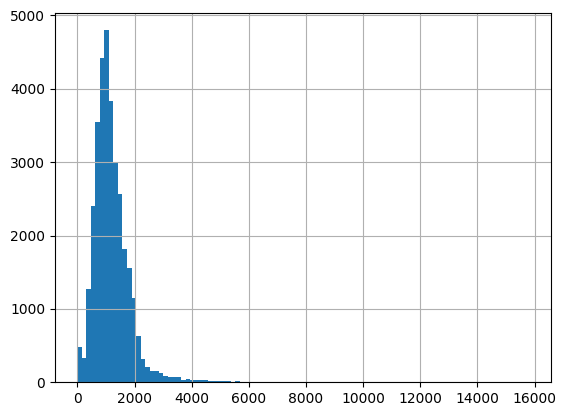

In [147]:
timestamps_df['average_time_between_questions'].hist(bins=100)

In [148]:
timestamps_df['average_time_between_questions'].describe()

count    33397.000000
mean      1203.777280
std        695.784739
min          0.000000
25%        802.507143
50%       1082.692714
75%       1475.144333
max      15778.021875
Name: average_time_between_questions, dtype: float64

In [150]:
timestamps_df['number_of_questions'].describe()

count    33397.000000
mean       153.877414
std         62.719681
min          3.000000
25%         99.000000
50%        200.000000
75%        200.000000
max        200.000000
Name: number_of_questions, dtype: float64

## 4. Data Exploration of the Content Metadata Dataset

### 4.1 Overview of the dataset

In [60]:
content_metadata_dataset

DatasetDict({
    question: Dataset({
        features: ['embeddings'],
        num_rows: 7652
    })
    concept: Dataset({
        features: ['embeddings'],
        num_rows: 1175
    })
})

In [61]:
# convert question and concept metadata to pandas dataframe
question_metadata_df = content_metadata_dataset["question"].to_pandas()
concept_metadata_df = content_metadata_dataset["concept"].to_pandas()

In [62]:
question_metadata_df.head()

,embeddings
0,"[-0.051382116973400005, 0.038179878145456, 0.1..."
1,"[-0.41981095075607305, -0.44120454788208, 0.18..."
2,"[-0.07020409405231401, -0.14976723492145502, 0..."
3,"[0.170141756534576, -0.07487745583057401, 0.62..."
4,"[-0.5033162832260131, -0.418284833431243, 0.68..."


In [63]:
question_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7652 entries, 0 to 7651
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   embeddings  7652 non-null   object
dtypes: object(1)
memory usage: 59.9+ KB


In [64]:
concept_metadata_df.head()

,embeddings
0,"[-0.639021217823028, -0.39561375975608803, -0...."
1,"[-0.28875786066055303, -0.21159636974334703, 0..."
2,"[-0.8079757690429681, -0.182293936610221, 1.14..."
3,"[-0.064750015735626, 0.297932118177413, 0.0339..."
4,"[-0.5244317054748531, -0.5898281931877131, 0.3..."


In [65]:
concept_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   embeddings  1175 non-null   object
dtypes: object(1)
memory usage: 9.3+ KB


In [68]:
print(f"Question Embedding size: {question_metadata_df['embeddings'].iloc[0].shape}")
print(f"Concept Embedding size: {concept_metadata_df['embeddings'].iloc[0].shape}")

Question Embedding size: (768,)
Concept Embedding size: (768,)


In [70]:
# check if the embeddings are normalized
question_metadata_df["embeddings"][0].sum()

np.float64(-0.5890809175616423)

> sum does not add upto 1 -> not normalised

Since there's not much information about questions and concepts we can run TSNE or UMAP on top of the embeddings and look for any clear clustering of questions and concepts

In [76]:
# TSNE on question embeddings
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

question_embeddings = np.array([embedding for embedding in question_metadata_df["embeddings"]])

In [87]:
# question_embeddings = StandardScaler().fit_transform(question_embeddings)

tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_iter=5000, verbose=1)
question_embeddings_tsne = tsne.fit_transform(question_embeddings)
question_embeddings_df = pd.DataFrame(question_embeddings_tsne, columns=["x", "y"])
question_embeddings_df["question"] = question_metadata_df.index
question_embeddings_df.head()

/mnt/research/Projects/KnowledgeTracing/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7652 samples in 0.007s...
[t-SNE] Computed neighbors for 7652 samples in 0.543s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7652
[t-SNE] Computed conditional probabilities for sample 2000 / 7652
[t-SNE] Computed conditional probabilities for sample 3000 / 7652
[t-SNE] Computed conditional probabilities for sample 4000 / 7652
[t-SNE] Computed conditional probabilities for sample 5000 / 7652
[t-SNE] Computed conditional probabilities for sample 6000 / 7652
[t-SNE] Computed conditional probabilities for sample 7000 / 7652
[t-SNE] Computed conditional probabilities for sample 7652 / 7652
[t-SNE] Mean sigma: 2.467850
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.569878
[t-SNE] KL divergence after 5000 iterations: 0.946857


,x,y,question
0,62.246998,1.862195,0
1,48.097610,6.855150,1
2,-31.356009,6.543938,2
3,-32.228184,6.623088,3
4,-8.727795,39.104874,4


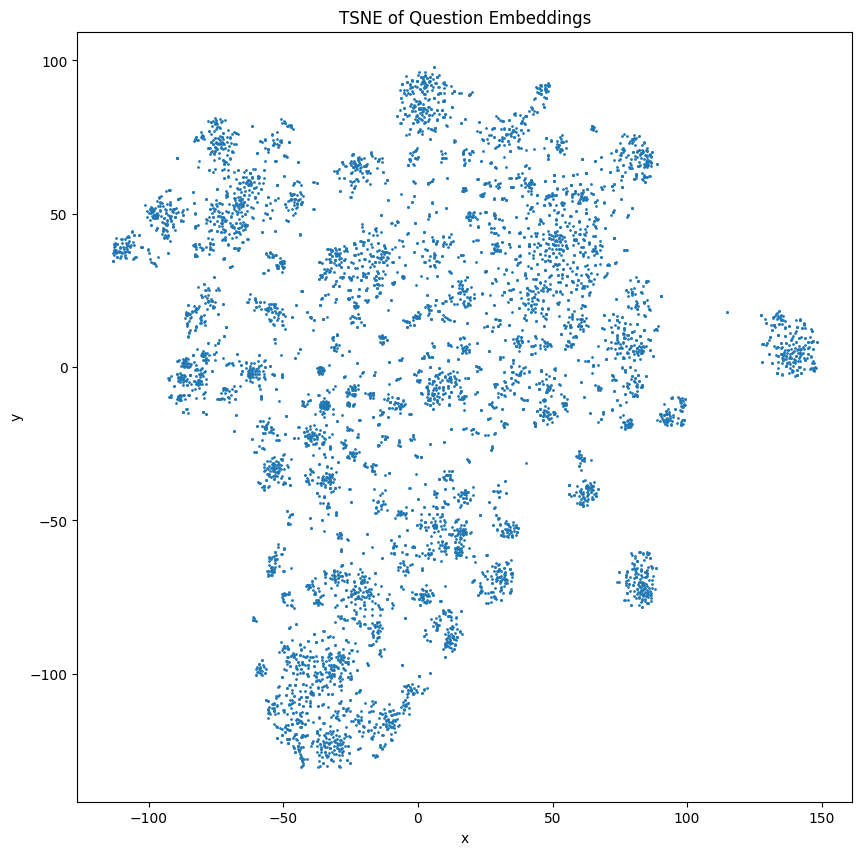

In [88]:
# plot the tsne
plt.figure(figsize=(10, 10))
plt.scatter(question_embeddings_df["x"], question_embeddings_df["y"], s=1)
plt.title("TSNE of Question Embeddings")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [85]:
# similarly concept embeddings
concept_embeddings = np.array([embedding for embedding in concept_metadata_df["embeddings"]])
# concept_embeddings = StandardScaler().fit_transform(concept_embeddings)
tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_iter=5000, verbose=1)
concept_embeddings_tsne = tsne.fit_transform(concept_embeddings)
concept_embeddings_df = pd.DataFrame(concept_embeddings_tsne, columns=["x", "y"])
concept_embeddings_df["concept"] = concept_metadata_df.index
concept_embeddings_df.head()

/mnt/research/Projects/KnowledgeTracing/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1175 samples in 0.002s...
[t-SNE] Computed neighbors for 1175 samples in 0.069s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1175
[t-SNE] Computed conditional probabilities for sample 1175 / 1175
[t-SNE] Mean sigma: 4.026825
[t-SNE] KL divergence after 50 iterations with early exaggeration: 65.282974
[t-SNE] KL divergence after 4950 iterations: 1.097774


,x,y,concept
0,9.880692,-13.424599,0
1,9.390502,-19.353317,1
2,-22.069479,-15.310191,2
3,-28.505043,9.911613,3
4,-24.215975,-16.411398,4


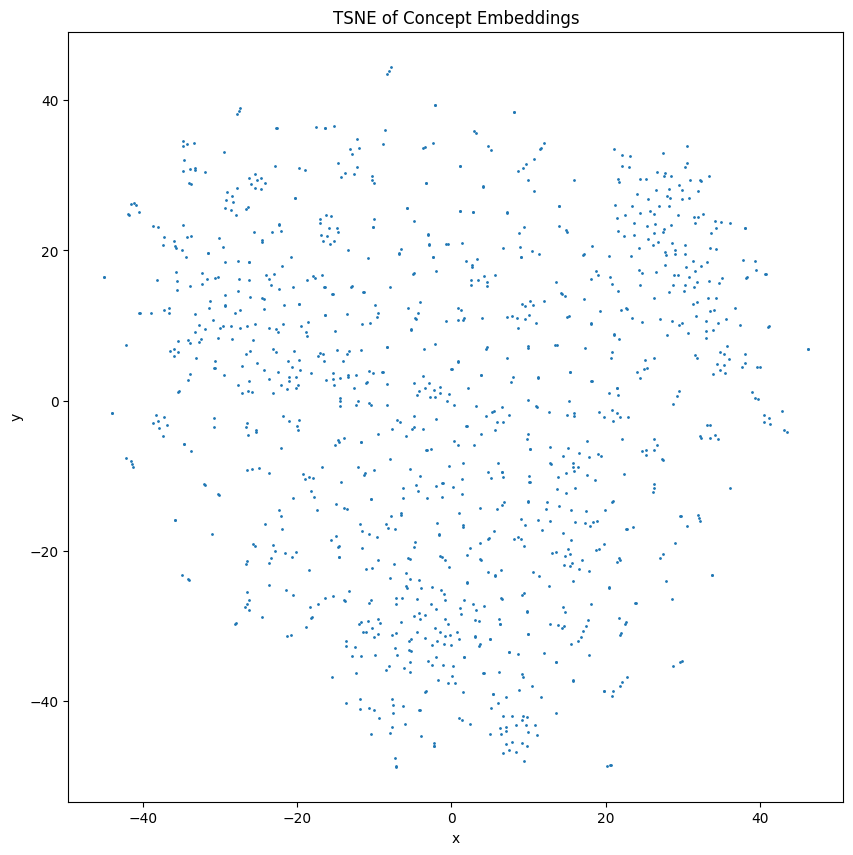

In [86]:
# plot the tsne
plt.figure(figsize=(10, 10))
plt.scatter(concept_embeddings_df["x"], concept_embeddings_df["y"], s=1)
plt.title("TSNE of Concept Embeddings")
plt.xlabel("x")
plt.ylabel("y")
plt.show()